In [80]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [81]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('mauna_loa')

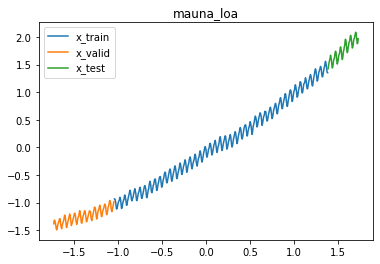

In [116]:
plt.plot(x_train,y_train, x_valid, y_valid,x_test,y_test)
plt.legend(['x_train', 'x_valid','x_test'])
plt.title('mauna_loa')
plt.show()

In [83]:
def RMSE(trueVal, predictedVal):
    return np.sqrt(np.sum((trueVal - predictedVal) ** 2)/len(trueVal))

In [109]:
#Lazy basis

def basisFunction(X) :
    
    b1 = np.ones(len(X))
    b2 = np.sum(X, axis=1)
    b3 = np.sum(X**2, axis=1)
#     b4 = np.sum(X**3, axis=1)

#     b5 = np.sum(np.cos(X),axis=1)
#     b6 = np.sum(np.sin(X),axis=1)

    b7 = np.sum(np.cos(110.19*X),axis=1)
    b8 = np.sum(np.sin(110.19*X),axis=1)

#     b9 = np.sum(np.exp(.3*X),axis=1)


#     phi = np.stack((b1,b2),1)
#     phi = np.stack((b1,b2,b3),1)
#     phi = np.stack((b1,b2,b3,b4),1)
#     phi = np.stack((b1,b2,b5,b6),1)
    phi = np.stack((b1,b2,b3,b7,b8),1)

    return phi

In [126]:
kvalues = list(range(1,40))
val_error = []
min_error = float('inf')

for k in kvalues:

    phi = basisFunction(x_train)
    U,S,V=np.linalg.svd(phi, full_matrices=False)
    S = np.diag(S)
    w = np.ones(phi.shape[1])
    I = np.identity(phi.shape[1])
    w = np.dot(S.T,S) + k*I
    w = np.linalg.inv(w)
    w = np.dot(V.T,w)
    w = np.dot(w,S.T)
    w = np.dot(w,U.T)
    w = np.dot(w,y_train)

    xt = basisFunction(x_valid)
    y_val_predicted = np.dot(xt,w)
    error_val = RMSE(y_valid,y_val_predicted)
    val_error.append(error_val)
    
    if error_val < min_error:
        min_error = error_val
        w_min = w

In [122]:
test_error = []
min_error = float('inf')

x_all = np.vstack([x_train, x_valid])
y_all = np.vstack([y_train, y_valid])

for k in kvalues:

    phi = basisFunction(x_all)
    U,S,V=np.linalg.svd(phi, full_matrices=False)
    S = np.diag(S)
    w = np.ones(phi.shape[1])
    I = np.identity(phi.shape[1])
    w = np.dot(S.T,S) + k*I
    w = np.linalg.inv(w)
    w = np.dot(V.T,w)
    w = np.dot(w,S.T)
    w = np.dot(w,U.T)
    w = np.dot(w,y_all)

    xt = basisFunction(x_test)
    y_test_predicted = np.dot(xt,w)
    error = RMSE(y_test,y_test_predicted)
    test_error.append(error)

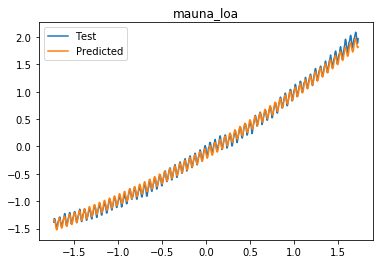

In [123]:
x_all = np.vstack([x_valid,x_train,x_test])
y_all = np.vstack([y_valid,y_train,y_test])

xt = basisFunction(x_all)
y_predicted = np.dot(xt,w_min)

plt.plot(x_all,y_all,x_all,y_predicted)
plt.legend(['Test', 'Predicted'])
plt.title('mauna_loa')
plt.show()

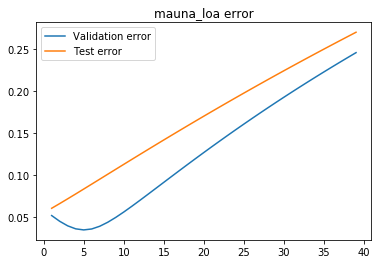

0.03427415304236824
4


In [125]:
plt.plot(kvalues,val_error, kvalues, test_error)
plt.legend(['Validation error', 'Test error'])
plt.title('mauna_loa error')
plt.show()

#MIN AT k=4
#MIN error 0.03427415304236824

print(np.min(val_error))
print(np.argmin(val_error))

In [114]:
# A = np.array([1,2,3,4,5,6]).reshape((-1, 1))
# y = np.array([1,2,3,4,5,6])
# # print(A)
# phi = basisFunction(A)
# # print(phi)
# w = np.ones(phi.shape[1])
# # print(w)
# I = np.identity(phi.shape[1])
# k = 1

# w = np.dot(phi.T,phi) + k*I
# w = np.linalg.inv(w)
# w = np.dot(w,phi.T)
# w = np.dot(w,y)
# print(w)

# xt = np.array([1,2,3]).reshape((-1, 1))
# res = np.dot(w,basisFunction(xt).T)
# print(res)

# A = np.array([1,2,3,4,5,6]).reshape((-1, 1))
# y = np.array([1,2,3,4,5,6])
# # print(A)
# phi = basisFunction(A)
# U,S,V=np.linalg.svd(phi, full_matrices=False)
# S = np.diag(S)
# # print(phi)
# w = np.ones(phi.shape[1])
# # print(w)
# I = np.identity(phi.shape[1])
# k = 1

# w = np.dot(S.T,S) + k*I
# w = np.linalg.inv(w)
# w = np.dot(V,w)
# w = np.dot(w,S.T)
# w = np.dot(w,U.T)
# w = np.dot(w,y)
# # print(w)

# xt = np.array([1,2,3]).reshape((-1, 1))
# res = np.dot(w,basisFunction(xt).T)
# # print(res)



In [115]:
# k = 1

# phi = basisFunction(x_train)
# w = np.ones(phi.shape[1])
# I = np.identity(phi.shape[1])
# w = np.dot(phi.T,phi) + k*I
# w = np.linalg.inv(w)
# w = np.dot(w,phi.T)
# w = np.dot(w,y_train)

# xt = basisFunction(x_valid)
# y_val_predicted = np.dot(xt,w)

# l2error = RMSE(y_valid,y_val_predicted)

# k = 1

# phi = basisFunction(x_train)
# U,S,V=np.linalg.svd(phi, full_matrices=False)
# # print('U',U.shape)
# # print('V',V.shape)
# # print('X',x_train.shape)

# S = np.diag(S)
# I = np.identity(phi.shape[1])

# w = np.dot(S.T,S) + k*I
# w = np.linalg.inv(w)
# w = np.dot(V,w)
# w = np.dot(w,S.T)
# w = np.dot(w,U.T)
# w = np.dot(w,y_train)

# xt = basisFunction(x_valid)
# y_val_predicted = np.dot(xt,w)

# l2error = RMSE(y_valid,y_val_predicted)